In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv("data/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


we can see that all the 25 columns have 30000 counts which indicates that there is no missing values.
we can see that the repayment status is indicated in columns PAY_0,Pay_2...with no pay_1 column,so we rename pay_0to pay_1 for ease of understanding

In [6]:
df.rename(columns={'default.payment.next.month':'def_pay'},inplace=True)
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

Next we check that the datatype of each variable of the dataset,we see that all

the columns ar int64 type whereas from previous knowledge we know that

sex,education,marriage,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next

_month are categorical are categorical features.so we convert these features

into the categorical features.

In [7]:
#checking the datatype for each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [8]:
#checking  for missing values
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

There is no missing values hence no imputation,now we can directly move towards visualization of given dataset.

Before moving to the visulization we first select features which we feel would be most correlated to the target variable.from the data provided we see that we want to predict wheather a person will default in payment next month or not.This predictions depends mostly on previous repayment history,like what is the limiting balance,age,education,and marriage.lets plot these first.

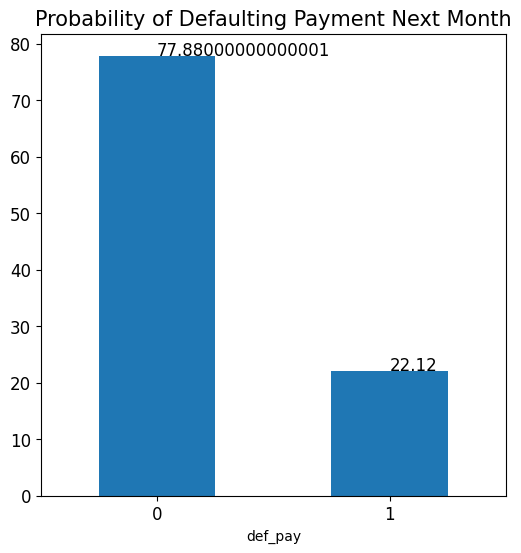

In [9]:
def_c=(df.def_pay.value_counts(normalize=True)*100)
def_c.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12,rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability of Defaulting Payment Next Month",fontsize=15)
for x,y in zip([0,1],def_c):
    plt.text(x,y,y,fontsize=12)
plt.show()

we can see that the dataset consists of 77%clients are not expected to default payment whereas 23% clients are expected to defaults payments.

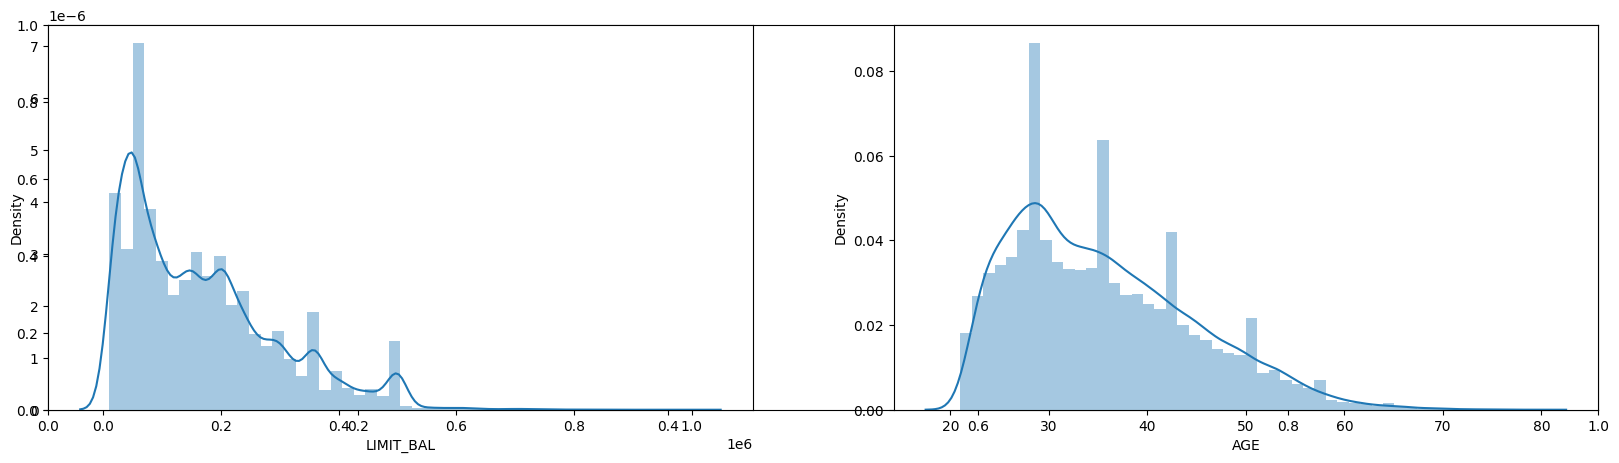

In [10]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)
plt.subplot(122)
sns.distplot(df.AGE)
plt.show()

By plotting the continuous variables we observe that dataset consists of the skewd data of limiting balance and age of clients. we have more number of clients having limiting balance between 0 to 200000 currency.

we have more number of clients from age bracket of 20 to 40,i.e..,clients from mostly young to mid aged groups.

we will observe the effect of variables on target variables below.

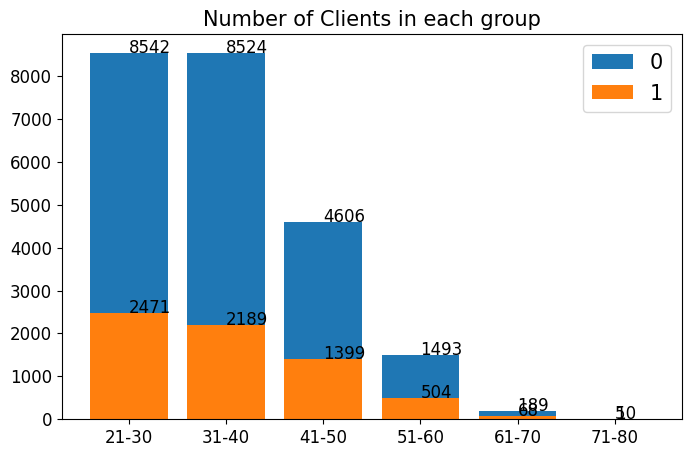

In [11]:
bins=[20,30,40,50,60,70,80]
names=['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN']=pd.cut(x=df.AGE,bins=bins,labels=names,right=True)
age_c=df.AGE_BIN.value_counts()
age_0=(df.AGE_BIN[df['def_pay']==0].value_counts())
age_1=(df.AGE_BIN[df['def_pay']==1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)

plt.bar(age_0.index,age_0.values,label='0')
plt.bar(age_1.index,age_1.values,label='1')

for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)

for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of Clients in each group",fontsize=15)
plt.legend(loc='upper right',fontsize=15)
plt.show()

we have maximum clients from 21-30 age group followed by 31-40,

hence with increasing age group the number of clients that will default

the payment next month is decreasing .Hence we can see that the age is important feature to predict the default payment for the next month.

----------------------------------------------


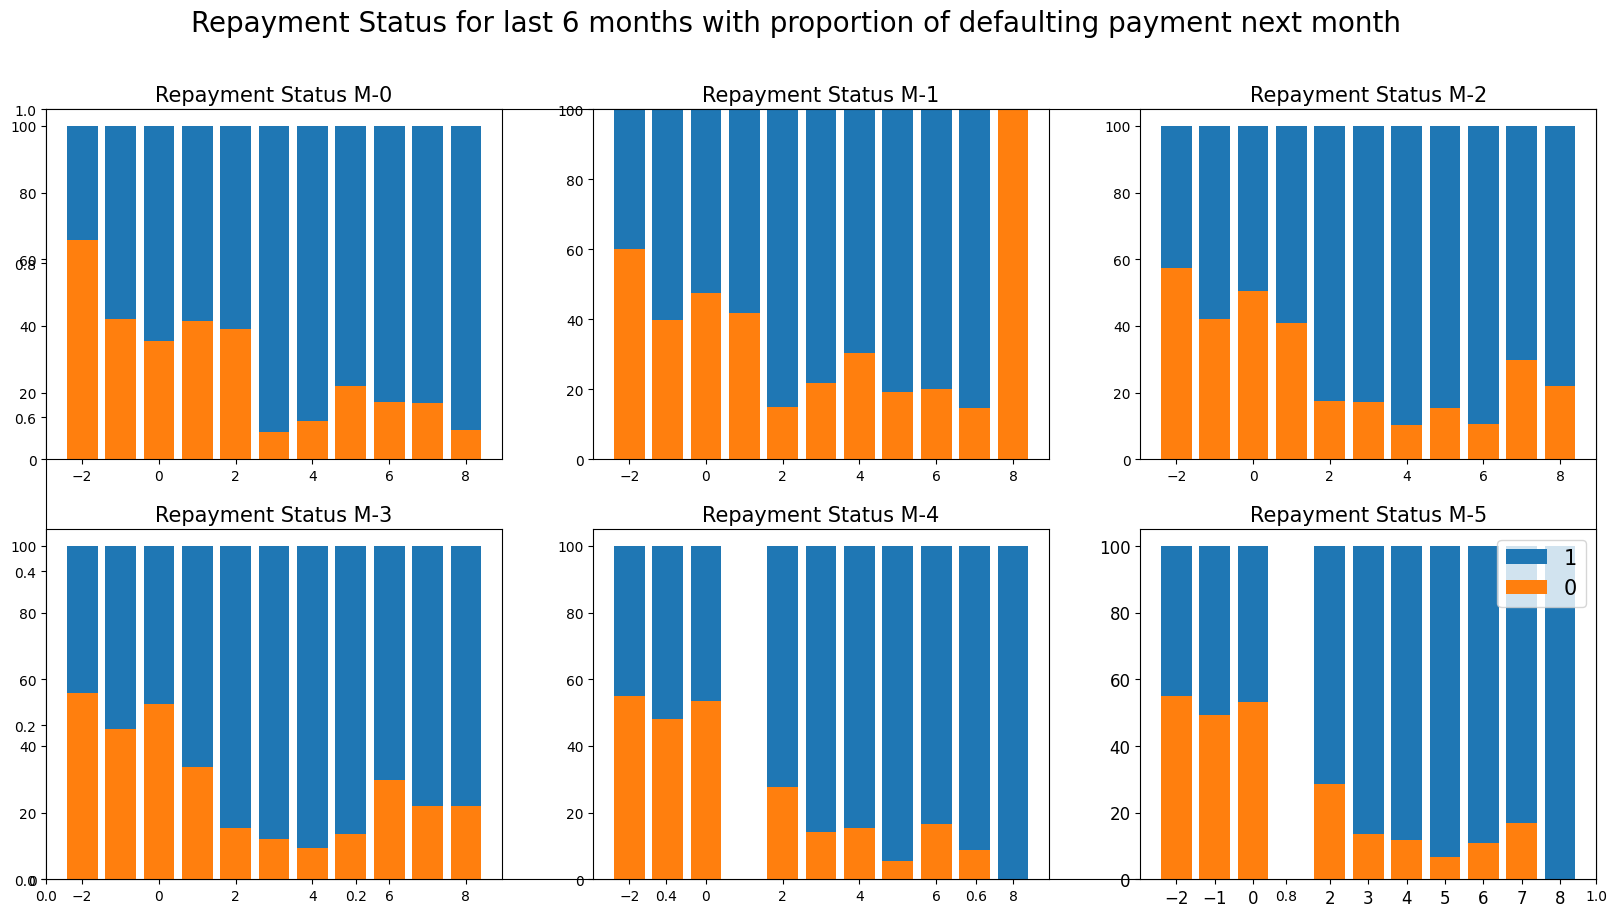

In [12]:
plt.subplots(figsize=(20,10))
ind=sorted(df.PAY_1.unique())
pay_0=(df.PAY_1[df['def_pay']==0].value_counts(normalize=True))
pay_1=(df.PAY_1[df['def_pay']==1].value_counts(normalize=True))
total=pay_0.values+pay_1.values
pay_0_prop=np.true_divide(pay_0,total)*100
pay_1_prop=np.true_divide(pay_1,total)*100
plt.subplot(231)
plt.bar(ind,pay_1_prop,bottom=pay_0_prop,label='1')
plt.bar(ind,pay_0_prop,label='0')
plt.title("Repayment Status M-0",fontsize=15)
print("----------------------------------------------")
ind=sorted(df.PAY_2.unique())
pay_0=(df.PAY_2[df['def_pay']==0].value_counts(normalize=True))
pay_1=(df.PAY_2[df['def_pay']==1].value_counts(normalize=True))

for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total=pay_0.values+pay_1.values
pay_0_prop=np.true_divide(pay_0,total)*100
pay_1_prop=np.true_divide(pay_1,total)*100
plt.subplot(232)
plt.bar(ind,pay_1_prop,bottom=pay_0_prop,label='1')
plt.bar(ind,pay_0_prop,label='0')
plt.title("Repayment Status M-1",fontsize=15)

ind=sorted(df.PAY_3.unique())
pay_0=(df.PAY_3[df['def_pay']==0].value_counts(normalize=True))
pay_1=(df.PAY_3[df['def_pay']==1].value_counts(normalize=True))

for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total=pay_0.values+pay_1.values
pay_0_prop=np.true_divide(pay_0,total)*100
pay_1_prop=np.true_divide(pay_1,total)*100
plt.subplot(233)
plt.bar(ind,pay_1_prop,bottom=pay_0_prop,label='1')
plt.bar(ind,pay_0_prop,label='0')
plt.title("Repayment Status M-2",fontsize=15)

ind=sorted(df.PAY_4.unique())
pay_0=(df.PAY_4[df['def_pay']==0].value_counts(normalize=True))
pay_1=(df.PAY_4[df['def_pay']==1].value_counts(normalize=True))

for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total=pay_0.values+pay_1.values
pay_0_prop=np.true_divide(pay_0,total)*100
pay_1_prop=np.true_divide(pay_1,total)*100
plt.subplot(234)
plt.bar(ind,pay_1_prop,bottom=pay_0_prop,label='1')
plt.bar(ind,pay_0_prop,label='0')
plt.title("Repayment Status M-3",fontsize=15)

ind=sorted(df.PAY_5.unique())
pay_0=(df.PAY_5[df['def_pay']==0].value_counts(normalize=True))
pay_1=(df.PAY_5[df['def_pay']==1].value_counts(normalize=True))

for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=1
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total=pay_0.values+pay_1.values
pay_0_prop=np.true_divide(pay_0,total)*100
pay_1_prop=np.true_divide(pay_1,total)*100
plt.subplot(235)
plt.bar(ind,pay_1_prop,bottom=pay_0_prop,label='1')
plt.bar(ind,pay_0_prop,label='0')
plt.title("Repayment Status M-4",fontsize=15)

ind=sorted(df.PAY_6.unique())
pay_0=(df.PAY_6[df['def_pay']==0].value_counts(normalize=True))
pay_1=(df.PAY_6[df['def_pay']==1].value_counts(normalize=True))

for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total=pay_0.values+pay_1.values
pay_0_prop=np.true_divide(pay_0,total)*100
pay_1_prop=np.true_divide(pay_1,total)*100
plt.subplot(236)
plt.bar(ind,pay_1_prop,bottom=pay_0_prop,label='1')
plt.bar(ind,pay_0_prop,label='0')
plt.title("Repayment Status M-5",fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)
plt.show()

Above plot shows us the proportion of clients that will default payment next month based on repayment history.
For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.

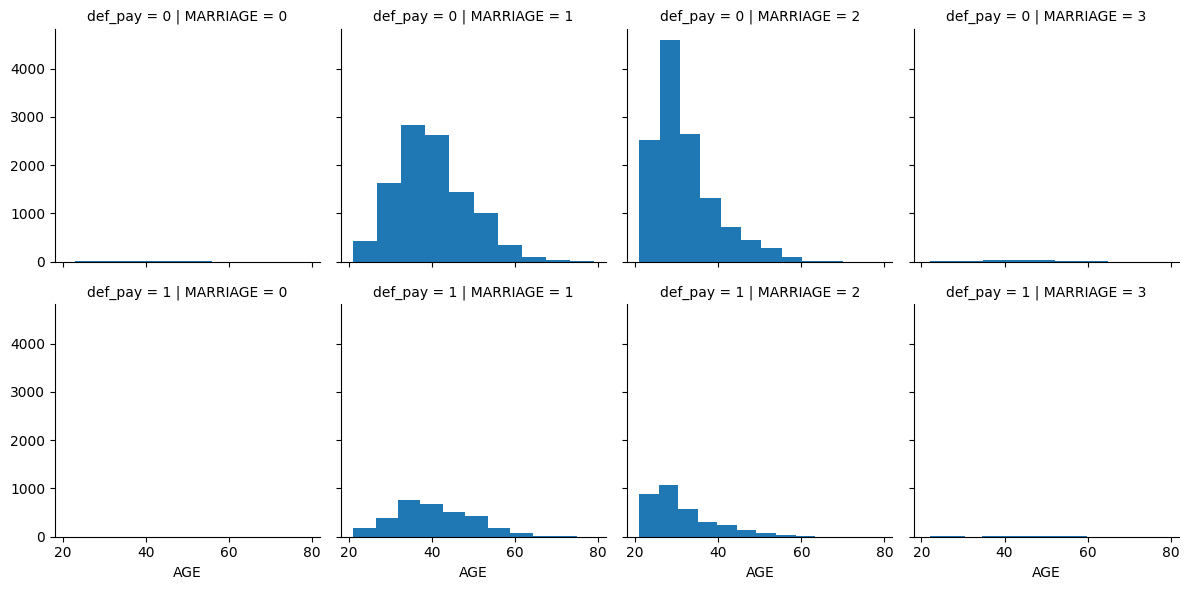

In [13]:
s=sns.FacetGrid(df,row='def_pay',col='MARRIAGE')
s=s.map(plt.hist,'AGE')
plt.show()

From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

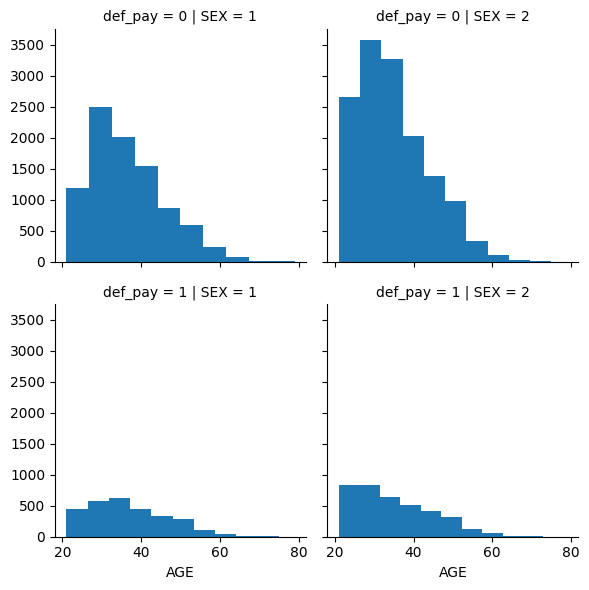

In [14]:
s=sns.FacetGrid(df,row='def_pay',col='SEX')
s=s.map(plt.hist,'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

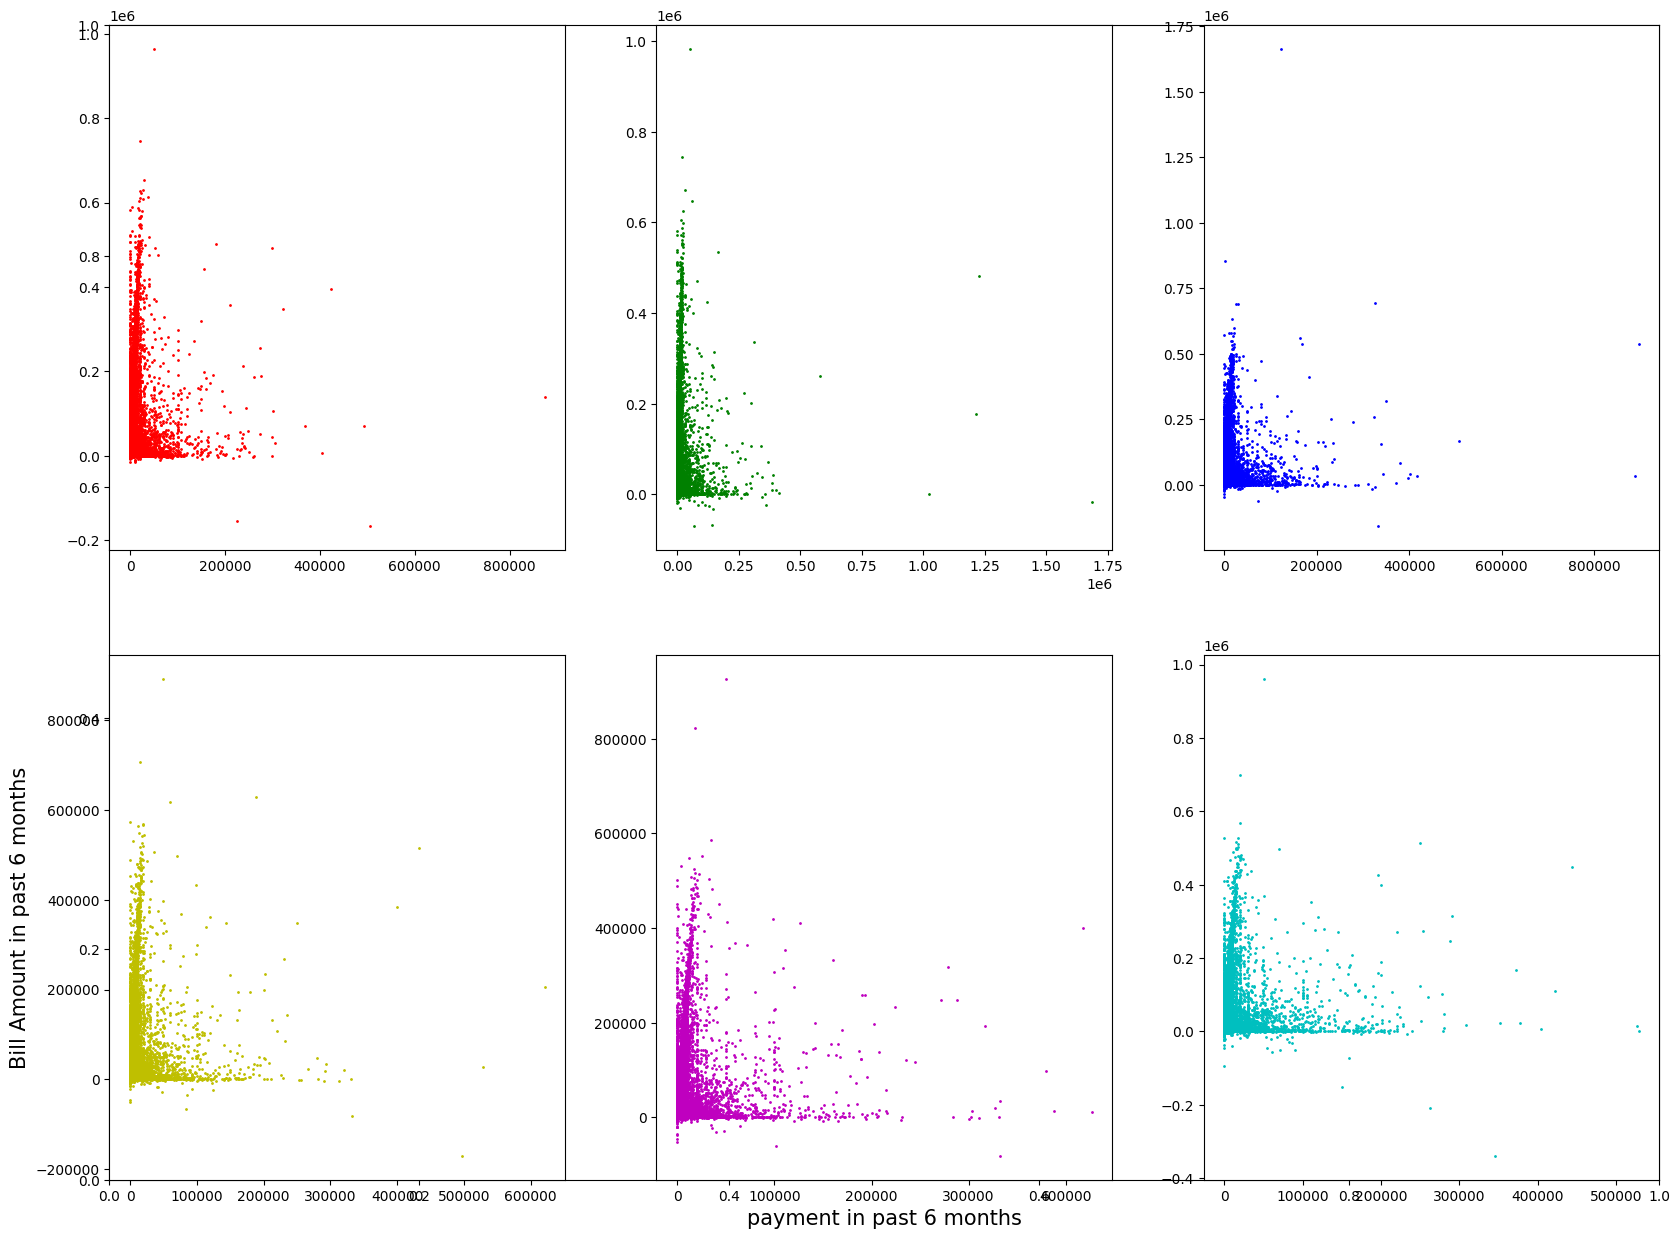

In [15]:
#checking the past six months bill amount will affect the payment default next month or not
plt.subplots(figsize=(20,15))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1,y=df.BILL_AMT1,c='r',s=1)
plt.subplot(232)
plt.scatter(x=df.PAY_AMT2,y=df.BILL_AMT2,c='g',s=1)
plt.subplot(233)
plt.scatter(x=df.PAY_AMT3,y=df.BILL_AMT3,c='b',s=1)
plt.subplot(234)
plt.scatter(x=df.PAY_AMT4,y=df.BILL_AMT4,c='y',s=1)
plt.ylabel("Bill Amount in past 6 months",fontsize=15)
plt.subplot(235)
plt.scatter(x=df.PAY_AMT5,y=df.BILL_AMT5,c='m',s=1)
plt.xlabel("payment in past 6 months",fontsize=15)
plt.subplot(236)
plt.scatter(x=df.PAY_AMT6,y=df.BILL_AMT6,c='c',s=1)
plt.show()

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

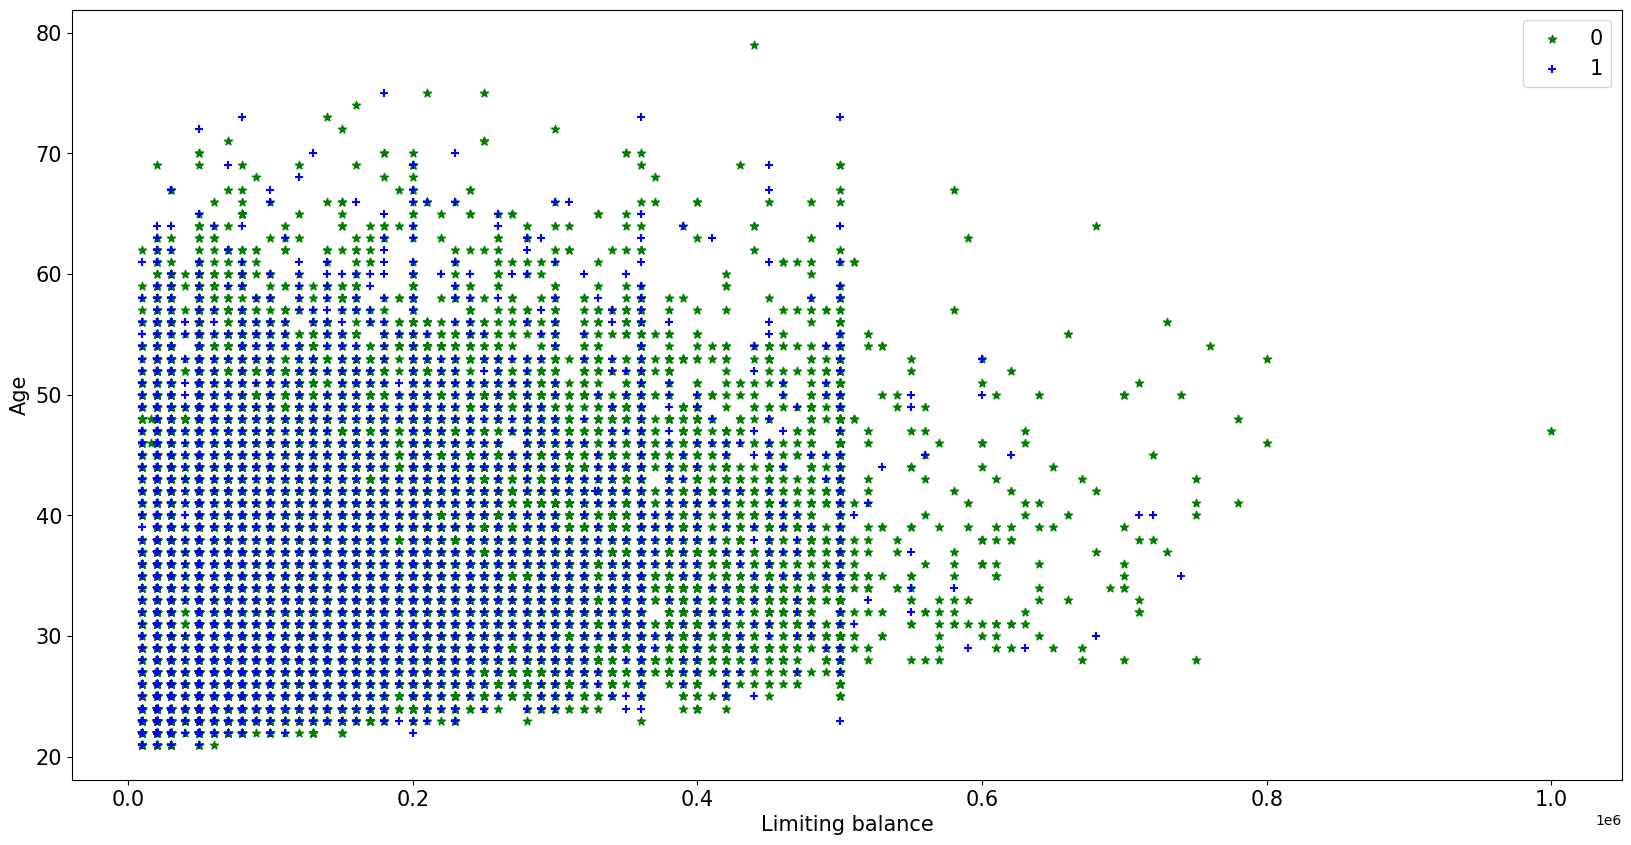

In [16]:
y1=df.AGE[df['def_pay']==0]
y2=df.AGE[df['def_pay']==1]
x1=df.LIMIT_BAL[df['def_pay']==0]
x2=df.LIMIT_BAL[df['def_pay']==1]

fig,ax=plt.subplots(figsize=(20,10))
plt.scatter(x1,y1,color='g',marker='*',label='0')
plt.scatter(x2,y2,color='b',marker='+',label='1')
plt.xlabel("Limiting balance",fontsize=15)
plt.ylabel("Age",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right',fontsize=15)

Above plot of Age against limiting balance does not provide any accurate information, as there is mixed variation of clients of all age groups and their current month limiting balance.

In [17]:
df.def_pay.value_counts()

def_pay
0    23364
1     6636
Name: count, dtype: int64

<Axes: >

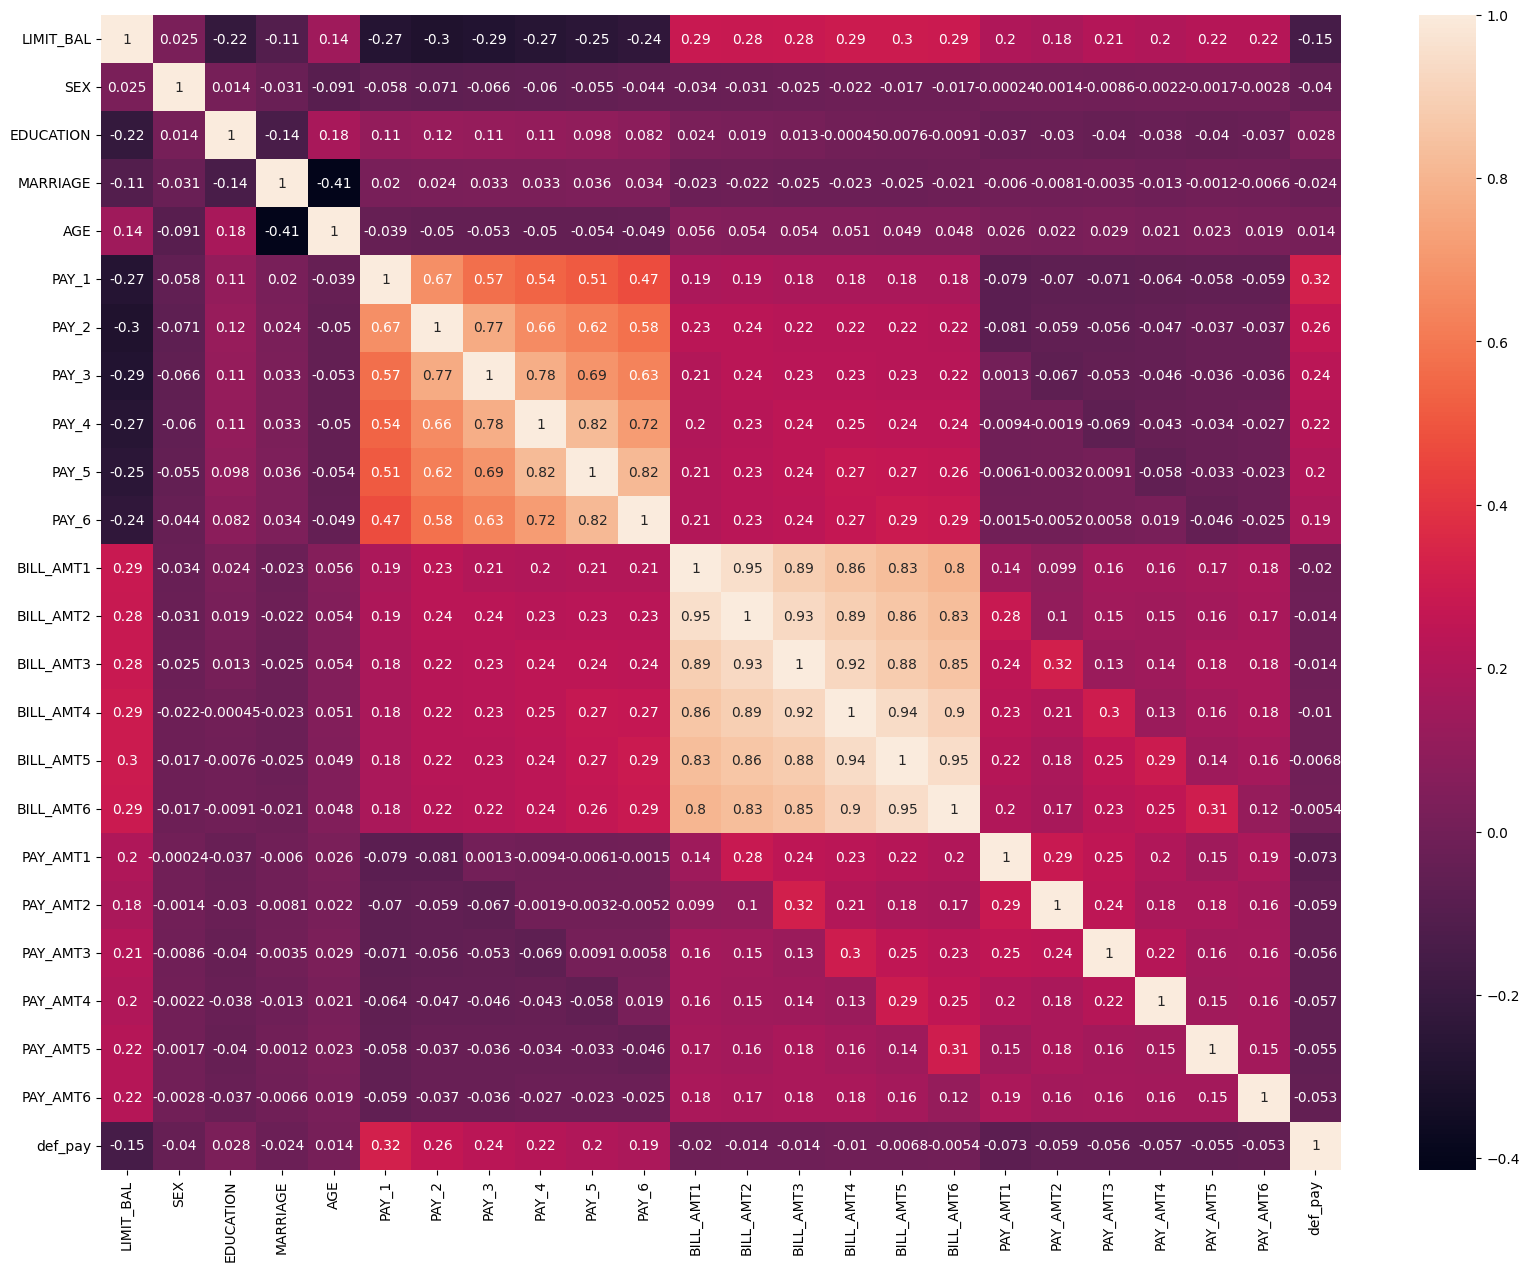

In [21]:
df.drop(columns=['ID','AGE_BIN'],axis=1,inplace=True)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

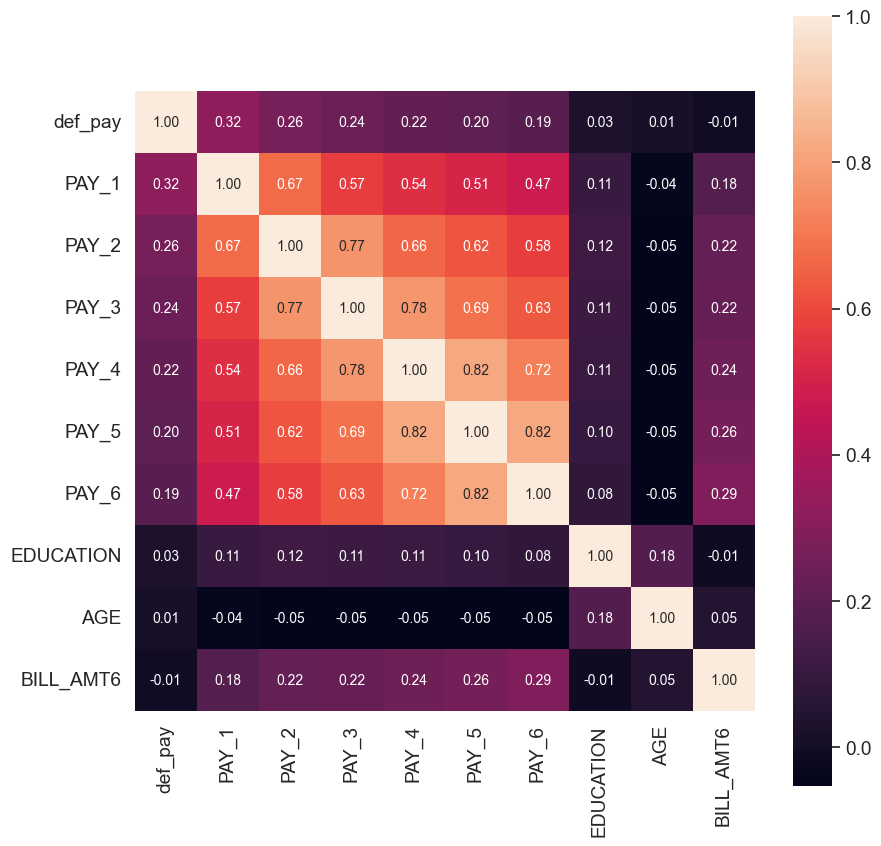

In [22]:
#saleprice correlation matrix
k=10 #number of variables
corrmat=df.corr(numeric_only=True)
cols=corrmat.nlargest(k,'def_pay')['def_pay'].index
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

as we can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the Repayment Status features.

We will first train model wil all the features and try reducing the non-important features.

In [23]:
df['def_pay'].value_counts()

def_pay
0    23364
1     6636
Name: count, dtype: int64

Imbalanced Machine Learning

<Axes: xlabel='def_pay'>

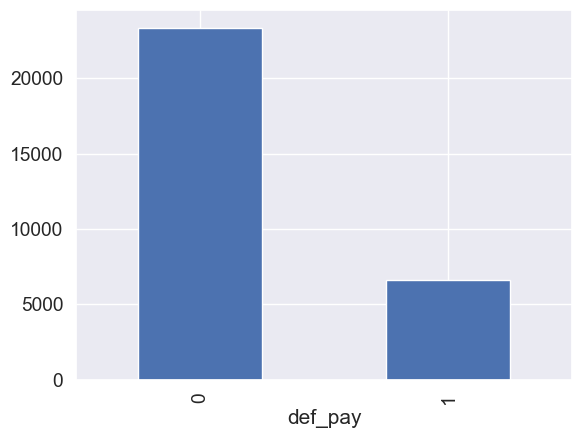

In [24]:
df.def_pay.value_counts().plot(kind='bar')

In [25]:
#creating the independent and the dependent features
X=df.iloc[:,1:-2]
y=df['def_pay']

In [26]:
#class count
class_0=df[df['def_pay']==0]
class_1=df[df['def_pay']==1]
print("Shape class_0:",class_0.shape)
print("shape class_1:",class_1.shape)#class count
class_0=df[df['def_pay']==0]
class_1=df[df['def_pay']==1]
print("Shape class_0:",class_0.shape)
print("shape class_1:",class_1.shape)

Shape class_0: (23364, 24)
shape class_1: (6636, 24)
Shape class_0: (23364, 24)
shape class_1: (6636, 24)


In [28]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rand=RandomUnderSampler(replacement=True,random_state=42)
x_res,y_res=rand.fit_resample(X,y)
print("Original dataset Shape:",Counter(y))
print("Resample dataset shape:",Counter(y_res))

Original dataset Shape: Counter({0: 23364, 1: 6636})
Resample dataset shape: Counter({0: 6636, 1: 6636})


In [29]:
from imblearn.over_sampling import RandomOverSampler
rand_o=RandomOverSampler(random_state=42,sampling_strategy='all')
x_res,y_res=rand_o.fit_resample(X,y)
print("Original dataset Shape:",Counter(y))
print("Resample dataset shape:",Counter(y_res))

Original dataset Shape: Counter({0: 23364, 1: 6636})
Resample dataset shape: Counter({1: 23364, 0: 23364})


In [30]:
from imblearn.under_sampling import TomekLinks
t1=TomekLinks(sampling_strategy='majority')
x_res,y_res=t1.fit_resample(X,y)
print("Original dataset Shape:",Counter(y))
print("Resample dataset Shape:",Counter(y_res))

Original dataset Shape: Counter({0: 23364, 1: 6636})
Resample dataset Shape: Counter({0: 21594, 1: 6636})


In [31]:
from imblearn.combine import SMOTEENN
smo=SMOTEENN()
x_res,y_res=smo.fit_resample(X,y)
print("Original dataset Shape:",Counter(y))
print("Resample dataset Shape:",Counter(y_res))

Original dataset Shape: Counter({0: 23364, 1: 6636})
Resample dataset Shape: Counter({1: 16884, 0: 10404})


In [32]:
from imblearn.under_sampling import NearMiss
ner=NearMiss()
x_res,y_res=ner.fit_resample(X,y)
print("Original dataset shape:",Counter(y))
print("Resample dataset shape:",Counter(y_res))

Original dataset shape: Counter({0: 23364, 1: 6636})
Resample dataset shape: Counter({0: 6636, 1: 6636})


<Axes: xlabel='BILL_AMT6', ylabel='Density'>

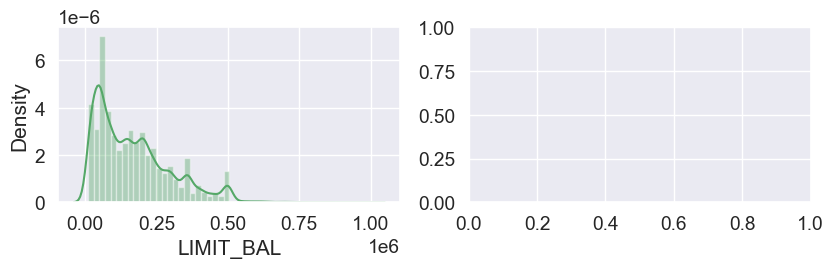

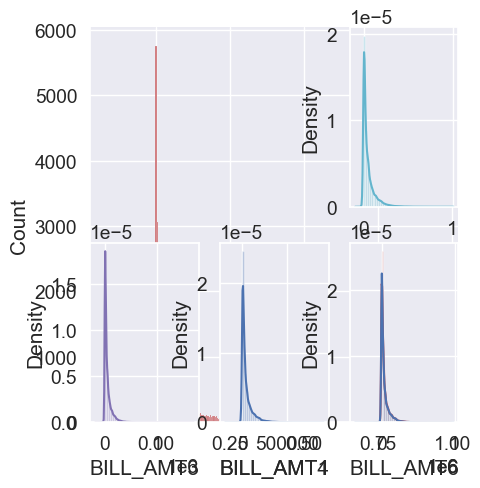

In [33]:
#EDA for checking the distribution of the dataset
plt.figure(figsize=(15,5))
plt.subplot(231)
sns.distplot(df['LIMIT_BAL'],color='g')
plt.subplot(232)
sns.displot(df['BILL_AMT1'],color='r')
plt.subplot(233)
sns.distplot(df['BILL_AMT2'],color='c')
plt.subplot(234)
sns.distplot(df['BILL_AMT3'],color='m')
plt.subplot(235)
sns.distplot(df['BILL_AMT4'],color='b')
plt.subplot(236)
sns.distplot(df['BILL_AMT5'],color='r')

sns.distplot(df['BILL_AMT6'])

<Axes: xlabel='PAY_4'>

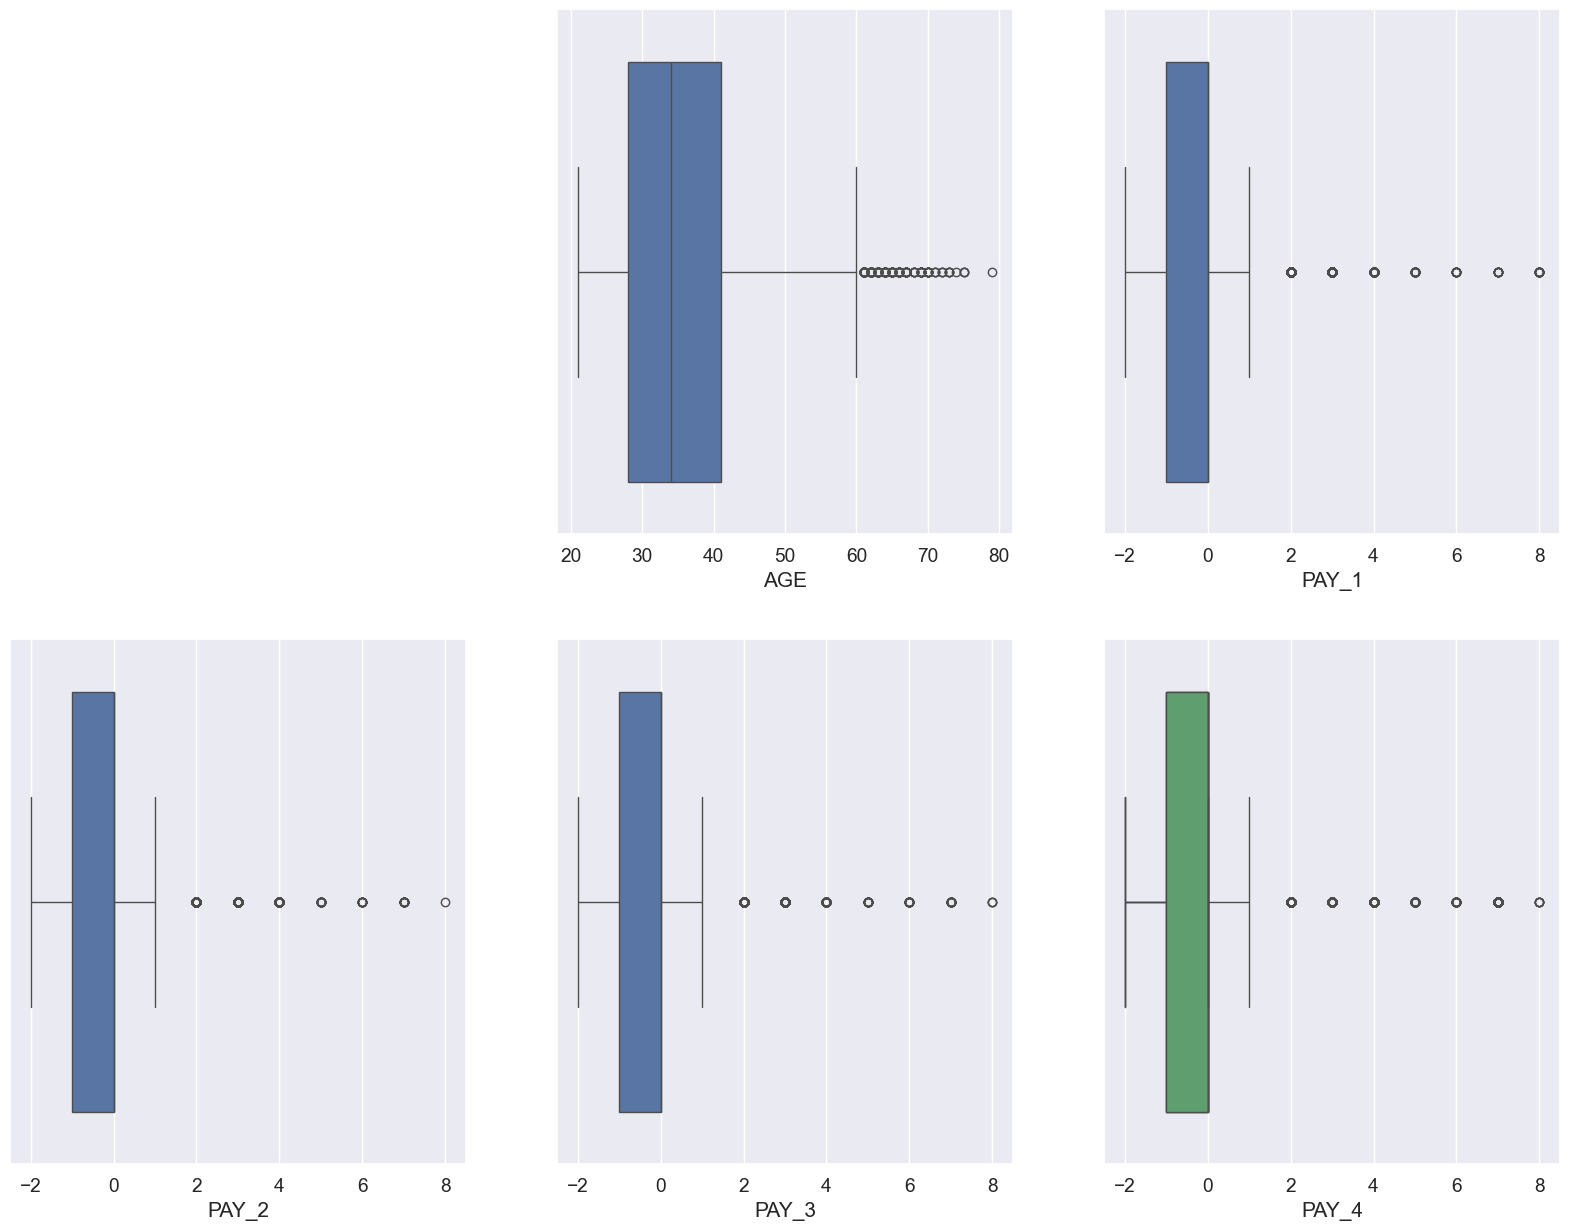

In [34]:
plt.rcParams['figure.figsize']=(20,15)
plt.subplot(232)
sns.boxplot(data=df,x=df['AGE'])
plt.subplot(233)
sns.boxplot(data=df,x=df['PAY_1'])
plt.subplot(234)
sns.boxplot(data=df,x=df['PAY_2'])
plt.subplot(235)
sns.boxplot(data=df,x=df['PAY_3'])
plt.subplot(236)
sns.boxplot(data=df,x=df['PAY_4'])
#plt.subplot(237)
sns.boxplot(data=df,x=df['PAY_5'])
#plt.subplot(238)
sns.boxplot(data=df,x=df['PAY_6'])

SuperVised Feature Selection

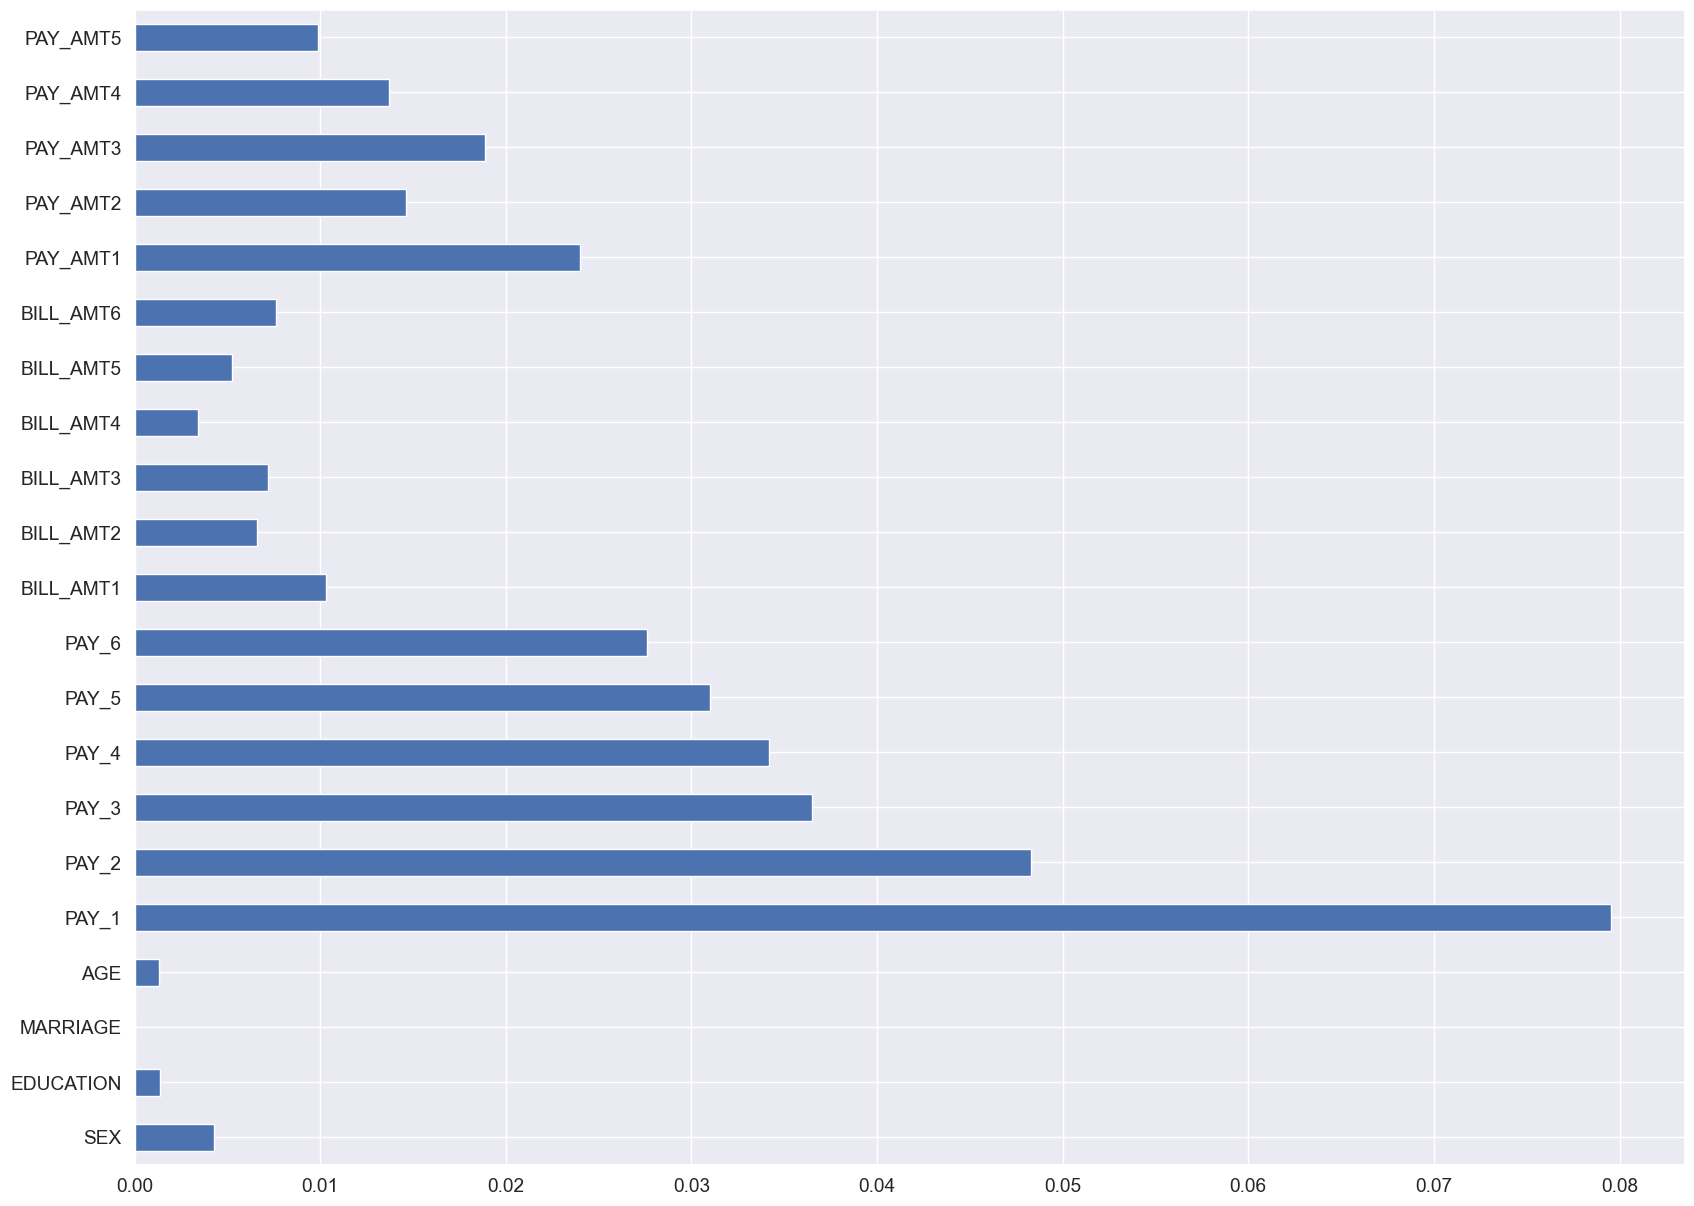

In [35]:
from sklearn.feature_selection import mutual_info_classif
importance=mutual_info_classif(X,y)
feat_importance=pd.Series(importance,df.columns[1:len(df.columns)-2])
feat_importance.plot(kind='barh',color='b')
plt.show()

In [37]:
#variance threshold
from sklearn.feature_selection import VarianceThreshold
thres=VarianceThreshold(threshold=5)
thres.fit(X)
thres.get_feature_names_out
#selected_indices = [i for i, is_selected in enumerate(thres) if is_selected]
print(thres.get_support())

[False False False  True False False False False False False  True  True
  True  True  True  True  True  True  True  True  True]


<BarContainer object of 21 artists>

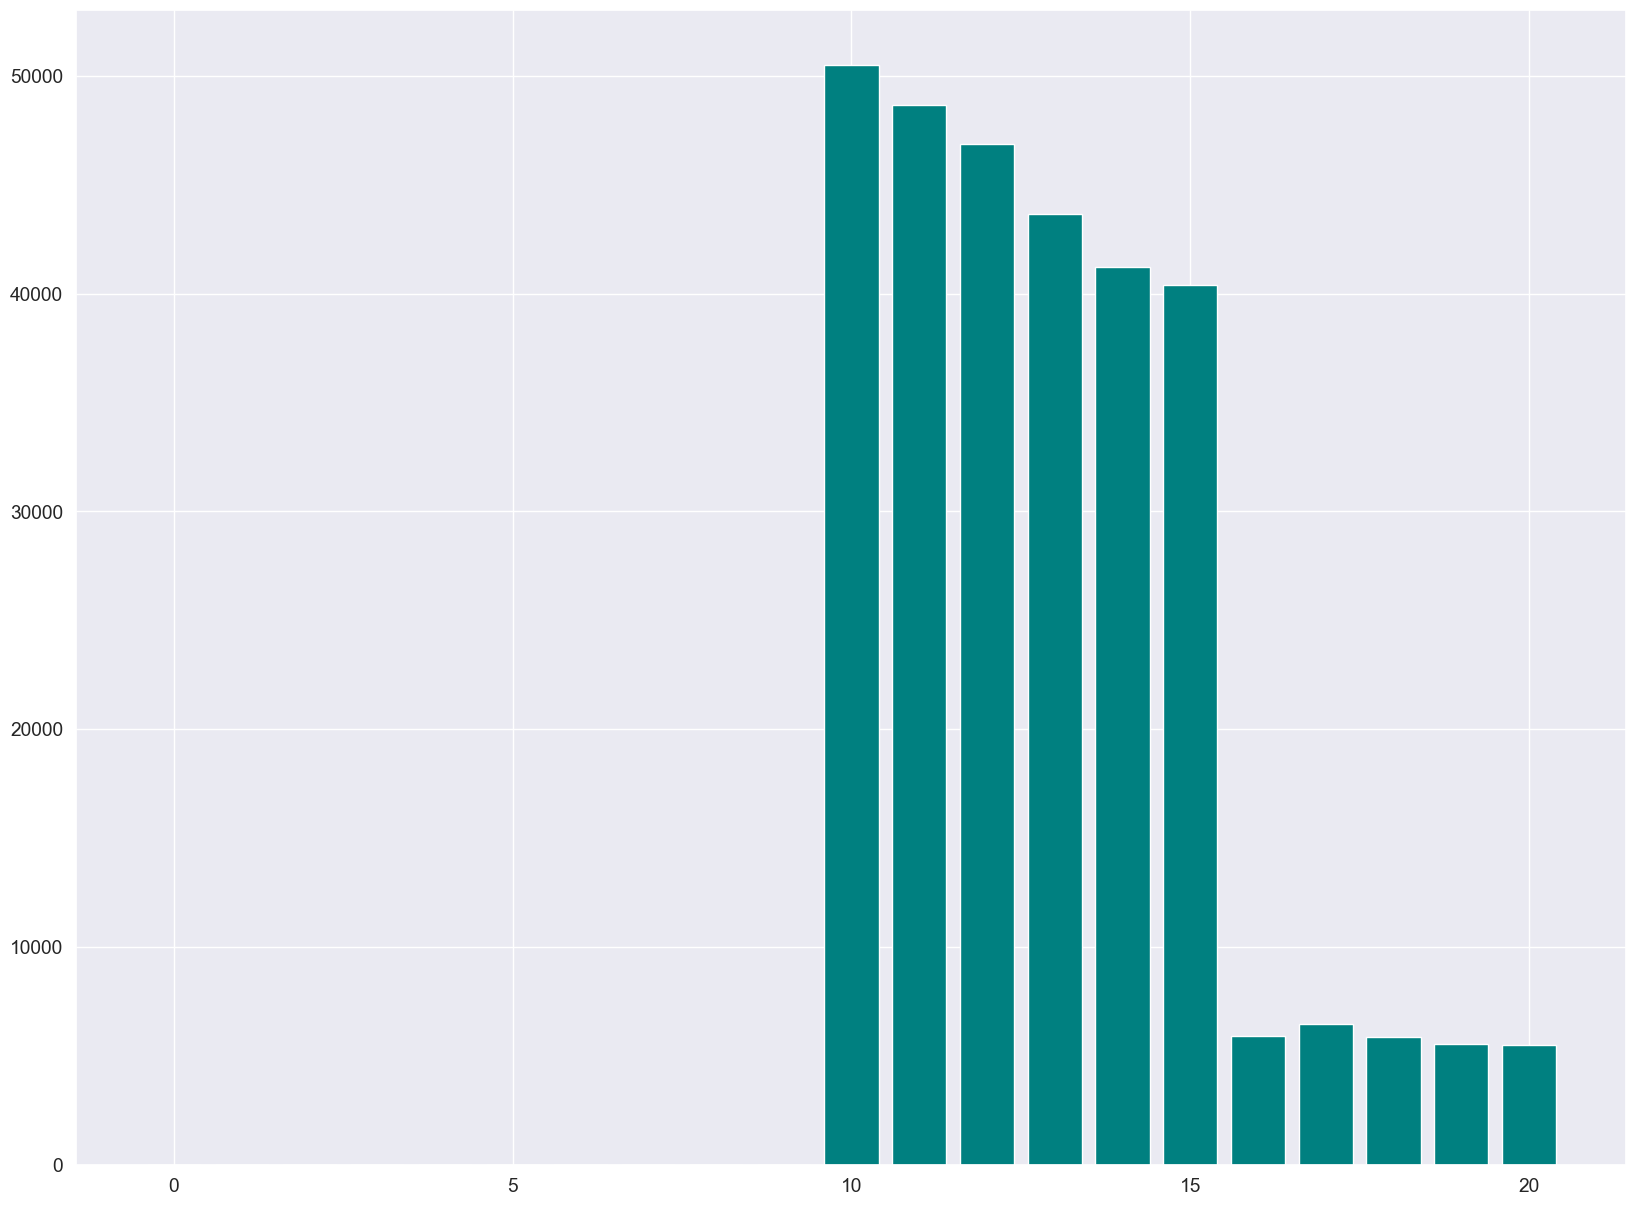

In [38]:
#meanabsolute difference
mad=np.sum(np.abs(X-np.mean(X,axis=0)),axis=0)/X.shape[0]
#plotting the bar chart
plt.bar(np.arange(X.shape[1]),mad,color='teal')